# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

The assignment is in the last cell.

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('../data/bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [2]:
bikes.dur.mean()

992.8716543657755

In [3]:
bikes.dur.std()

2073.9809135296764

In [4]:
bikes[bikes.dur>16000].shape

(973, 12)

In [5]:
plt.rcParams['figure.figsize'] = 20, 10

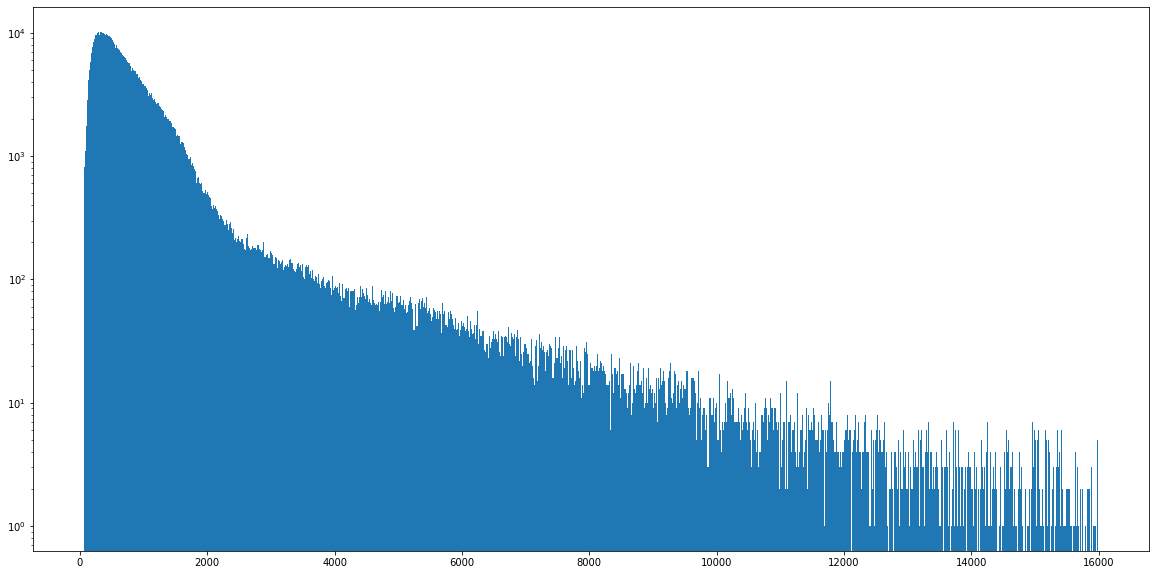

In [6]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [7]:
short = bikes[bikes.dur<16000]

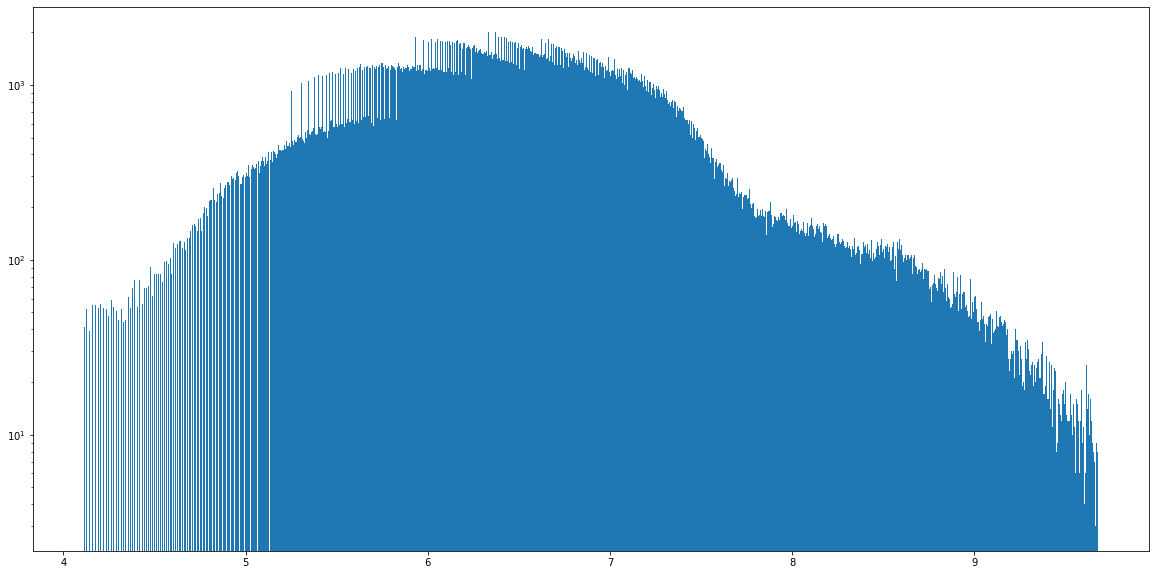

In [8]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

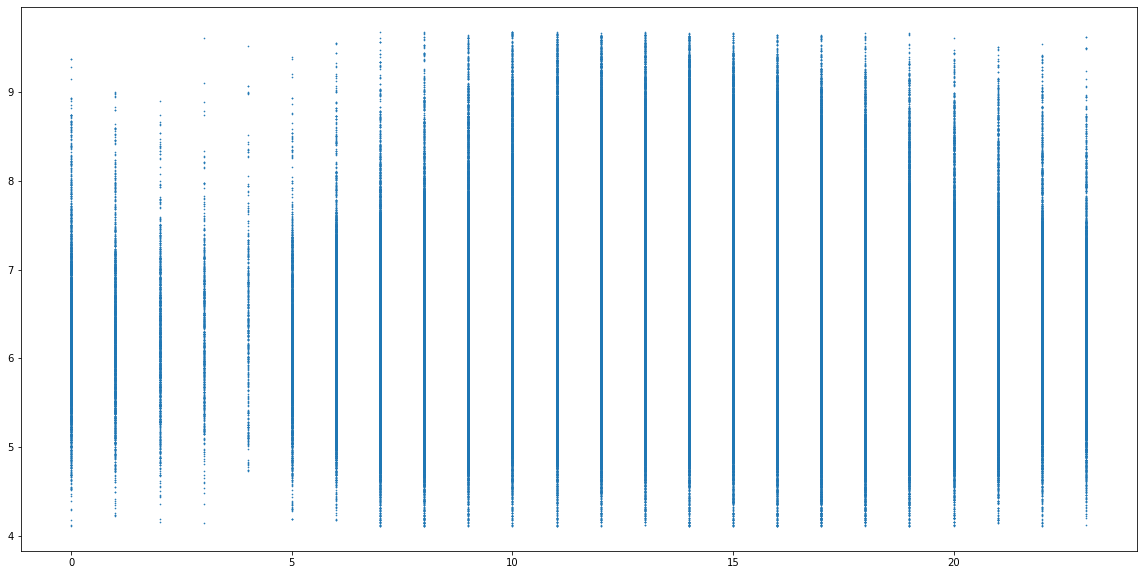

In [9]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [10]:
np.log1p(0), np.log(0)

/Users/Carancho/miniconda3/envs/hw4/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(0.0, -inf)

In [11]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [12]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [13]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [14]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
...                      ...         ...       ...                   ...   
11.2    21                 2           2         2                     2   
11.3    14                 1           1         1                     1   
        17                 1           1         1                     1   
        19                 1           1         1                     1   
11.4    18                 1           1         1                     1   

               Start station  End station number  End station  Bike number  \
log_dur start                                                                
4.1     7                  1                   1            1            1   
        9                  2                   2            2            2   
        11                 1                   1            1            1   
        14                 2                   2            2            2   
        16                 2                   2            2            2   
...                      ...                 ...          ...          ...   
11.2    21                 2                   2            2            2   
11.3    14                 1                   1            1            1   
        17                 1                   1            1            1   
        19                 1                   1            1            1   
11.4    18                 1                   1            1            1   

               Member Type  start  end  dur  
log_dur start                                
4.1     7                1      1    1    1  
        9                2      2    2    2  
        11               1      1    1    1  
        14               2      2    2    2  
        16               2      2    2    2  
...                    ...    ...  ...  ...  
11.2    21               2      2    2    2  
11.3    14               1      1    1    1  
        17               1      1    1    1  
        19               1      1    1    1  
11.4    18               1      1    1    1  

[1184 rows x 12 columns]

In [15]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


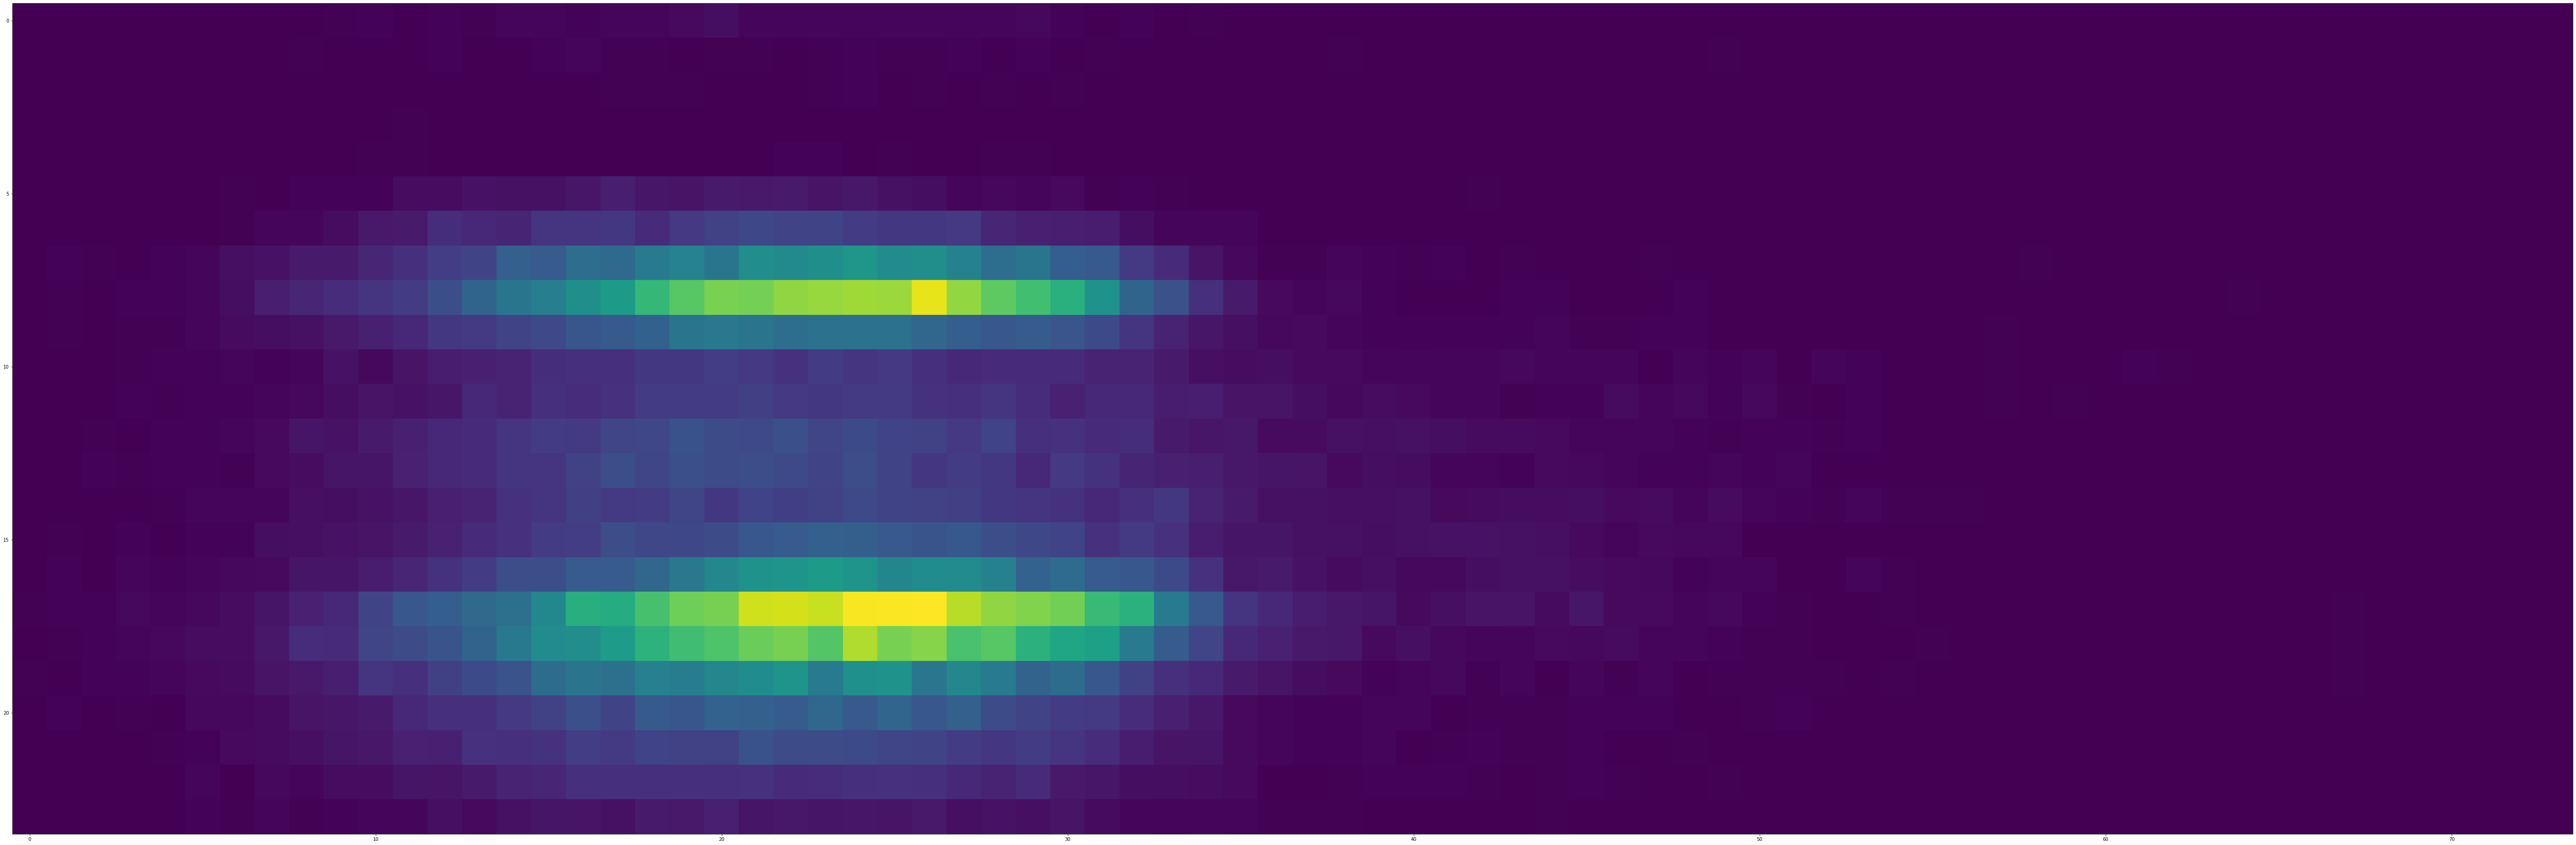

In [16]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

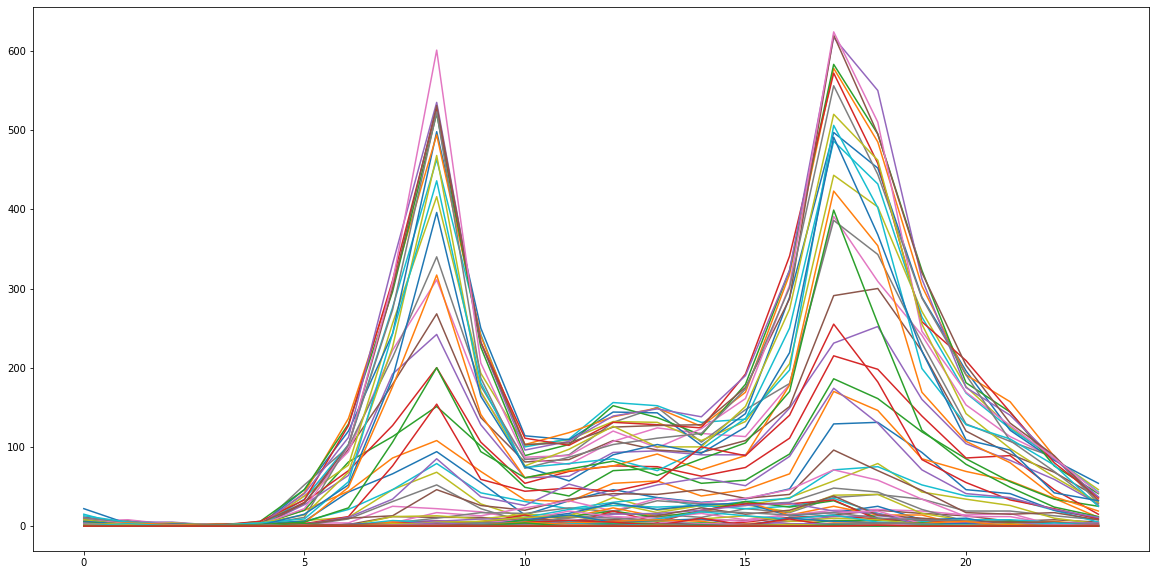

In [17]:
_=plt.plot(duration_hour)

In [18]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [19]:
np.round(.65, 1)

0.6

In [20]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [21]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [22]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

NameError: name 'y' is not defined

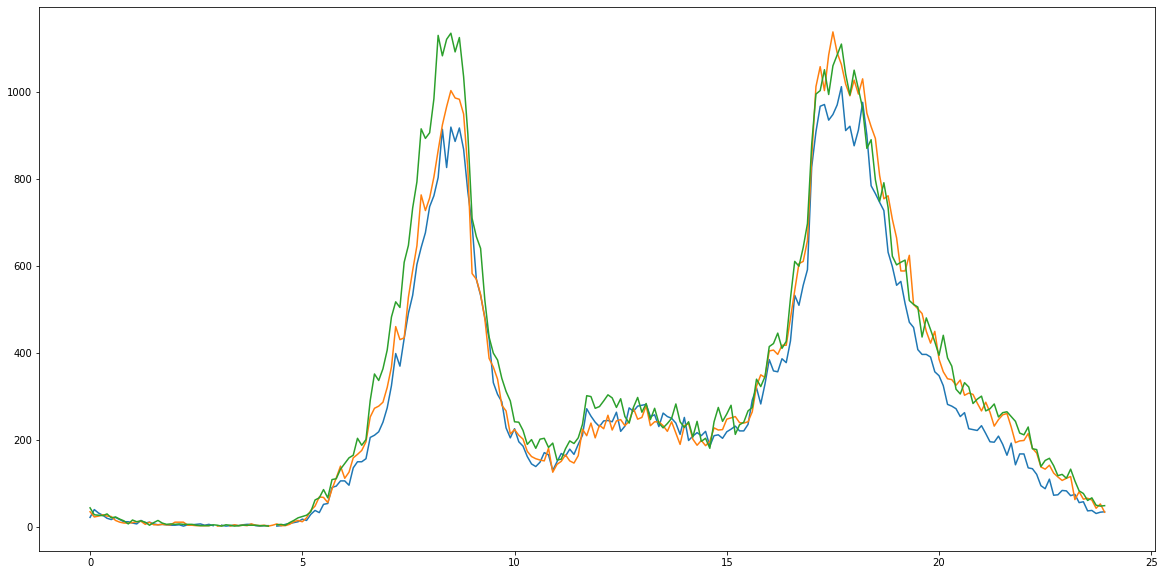

In [23]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
plt.plot(y.index, day_hour_count[3])
plt.plot(y.index, day_hour_count[4])
plt.plot(y.index, day_hour_count[5])
plt.plot(y.index, day_hour_count[6])

In [29]:
day_hour_count

start,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


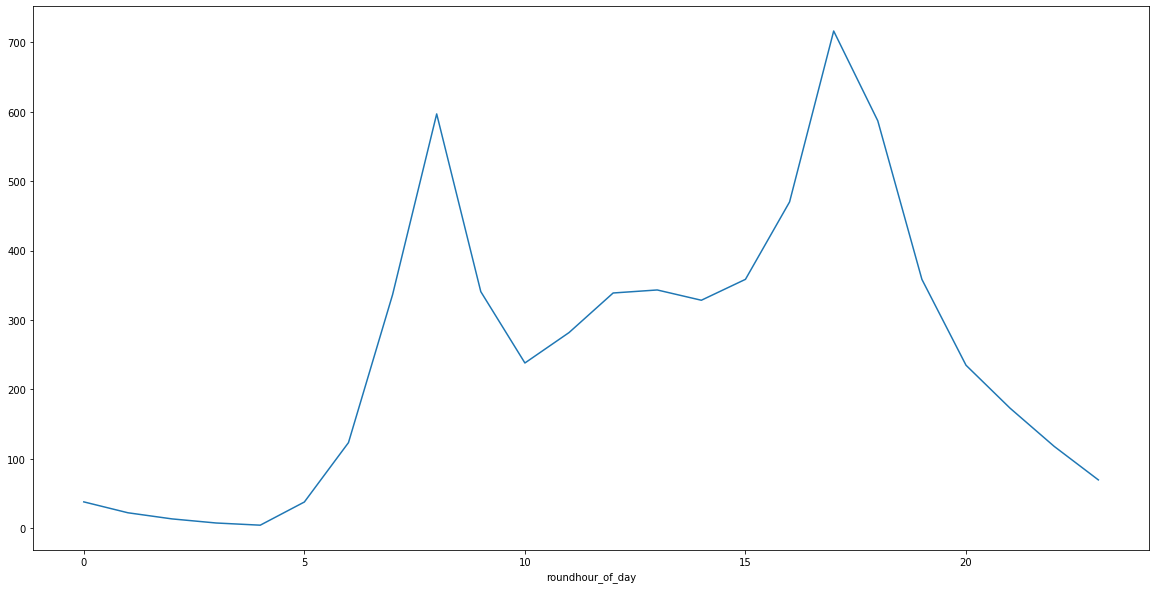

In [28]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [26]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

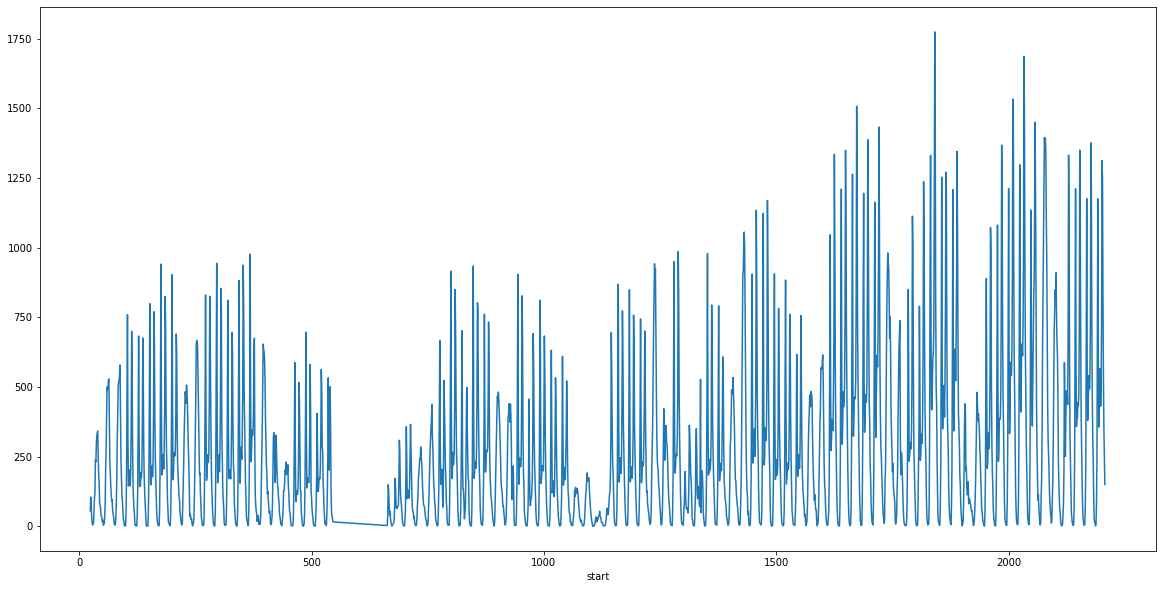

In [27]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [30]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [31]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [32]:
day_hour.start.unstack()

start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start,,,,,,,,,,,,,,,,,,,,,
1,56.0,105.0,74.0,32.0,13.0,5.0,10.0,14.0,54.0,101.0,...,324.0,338.0,342.0,247.0,185.0,160.0,90.0,75.0,70.0,39.0
2,37.0,31.0,17.0,23.0,4.0,7.0,10.0,34.0,80.0,203.0,...,495.0,525.0,529.0,392.0,232.0,188.0,150.0,114.0,91.0,96.0
3,59.0,42.0,39.0,15.0,6.0,9.0,5.0,33.0,87.0,168.0,...,524.0,546.0,579.0,398.0,237.0,172.0,115.0,96.0,64.0,28.0
4,20.0,6.0,2.0,1.0,3.0,58.0,192.0,468.0,759.0,321.0,...,145.0,206.0,365.0,700.0,547.0,293.0,146.0,96.0,62.0,44.0
5,5.0,5.0,3.0,1.0,2.0,42.0,131.0,363.0,683.0,329.0,...,175.0,208.0,365.0,676.0,519.0,279.0,178.0,122.0,86.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,113.0,82.0,50.0,34.0,12.0,24.0,94.0,166.0,297.0,509.0,...,910.0,761.0,667.0,611.0,475.0,243.0,158.0,101.0,62.0,51.0
88,15.0,7.0,2.0,3.0,8.0,42.0,81.0,197.0,587.0,464.0,...,481.0,437.0,696.0,1332.0,1113.0,620.0,324.0,226.0,148.0,45.0
89,31.0,11.0,9.0,3.0,8.0,79.0,240.0,727.0,1211.0,564.0,...,433.0,473.0,700.0,1350.0,1159.0,700.0,400.0,279.0,178.0,82.0


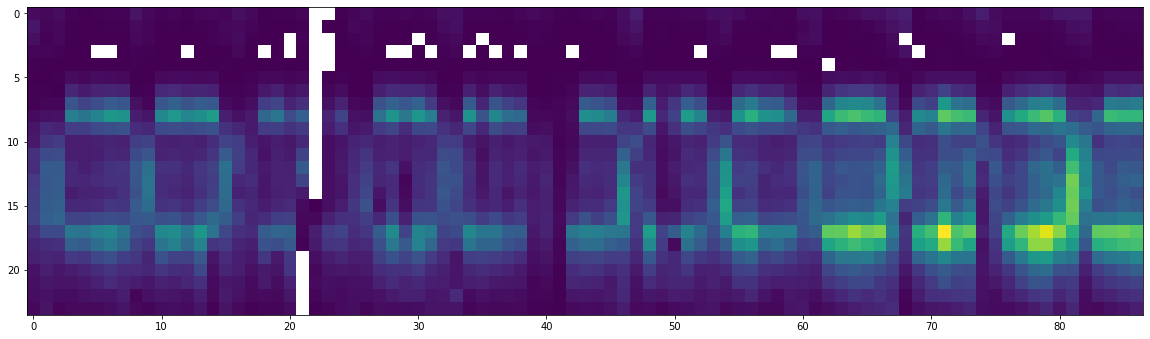

In [33]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

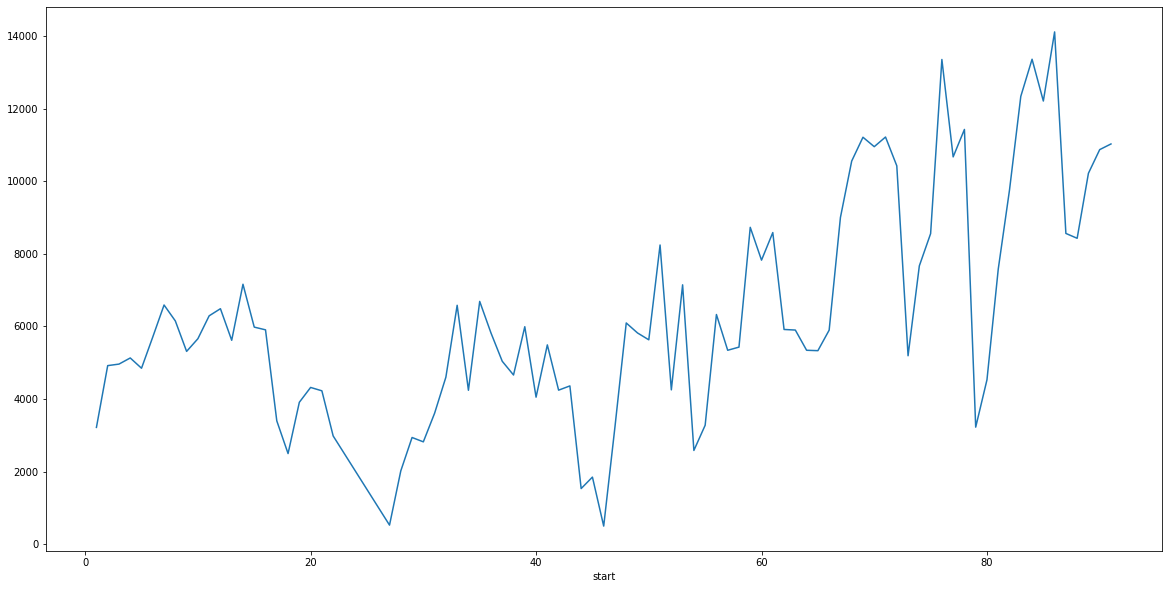

In [34]:
day_count.start.plot()

In [35]:
bikes.start.dt.dayofyear

0         91
1         91
2         91
3         91
4         91
          ..
552394     1
552395     1
552396     1
552397     1
552398     1
Name: start, Length: 552399, dtype: int64

In [36]:
bikes[bikes.start=="2016-01-10"].shape

(1, 15)

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

## 1. Using the **`day_hour_count`** dataframe create two dataframe `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [85]:
monday = pd.DataFrame(day_hour_count[0]).reset_index().dropna()
saturday = pd.DataFrame(day_hour_count[5]).reset_index().dropna()
monday.columns = ['hour','monday']
saturday.columns = ['hour','saturday']
monday,saturday

(     hour  monday
 0     0.0    21.0
 1     0.1    39.0
 2     0.2    31.0
 3     0.3    26.0
 4     0.4    19.0
 ..    ...     ...
 235  23.5    36.0
 236  23.6    37.0
 237  23.7    30.0
 238  23.8    33.0
 239  23.9    34.0
 
 [238 rows x 2 columns],
      hour  saturday
 0     0.0      89.0
 1     0.1      87.0
 2     0.2      98.0
 3     0.3      99.0
 4     0.4      98.0
 ..    ...       ...
 235  23.5      93.0
 236  23.6      95.0
 237  23.7     105.0
 238  23.8      93.0
 239  23.9     111.0
 
 [240 rows x 2 columns])


## 2a. Create 3 models fit to `monday` with varying polynomial degrees. Repeat for 

In [195]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# create 3 sep groups from the monday data to build 3 models.
mon_group_1 = monday.iloc[0:79:,]
mon_group_2 = monday.iloc[78:158:,]
mon_group_3 = monday.iloc[157:,]

print(mon_group_1,mon_group_2,mon_group_3)

    hour  monday
0    0.0    21.0
1    0.1    39.0
2    0.2    31.0
3    0.3    26.0
4    0.4    19.0
..   ...     ...
76   7.6   532.0
77   7.7   603.0
78   7.8   642.0
79   7.9   676.0
80   8.0   736.0

[79 rows x 2 columns]      hour  monday
80    8.0   736.0
81    8.1   761.0
82    8.2   803.0
83    8.3   914.0
84    8.4   826.0
..    ...     ...
155  15.5   235.0
156  15.6   291.0
157  15.7   319.0
158  15.8   282.0
159  15.9   328.0

[80 rows x 2 columns]      hour  monday
159  15.9   328.0
160  16.0   384.0
161  16.1   358.0
162  16.2   356.0
163  16.3   386.0
..    ...     ...
235  23.5    36.0
236  23.6    37.0
237  23.7    30.0
238  23.8    33.0
239  23.9    34.0

[81 rows x 2 columns]


[ 0.00000000e+00  1.28845744e+02 -6.31024866e+02  1.09226658e+03
 -9.96474539e+02  5.41238367e+02 -1.85048334e+02  4.07305533e+01
 -5.74779479e+00  5.01341373e-01 -2.45540605e-02  5.15259645e-04] 24.052598988142194


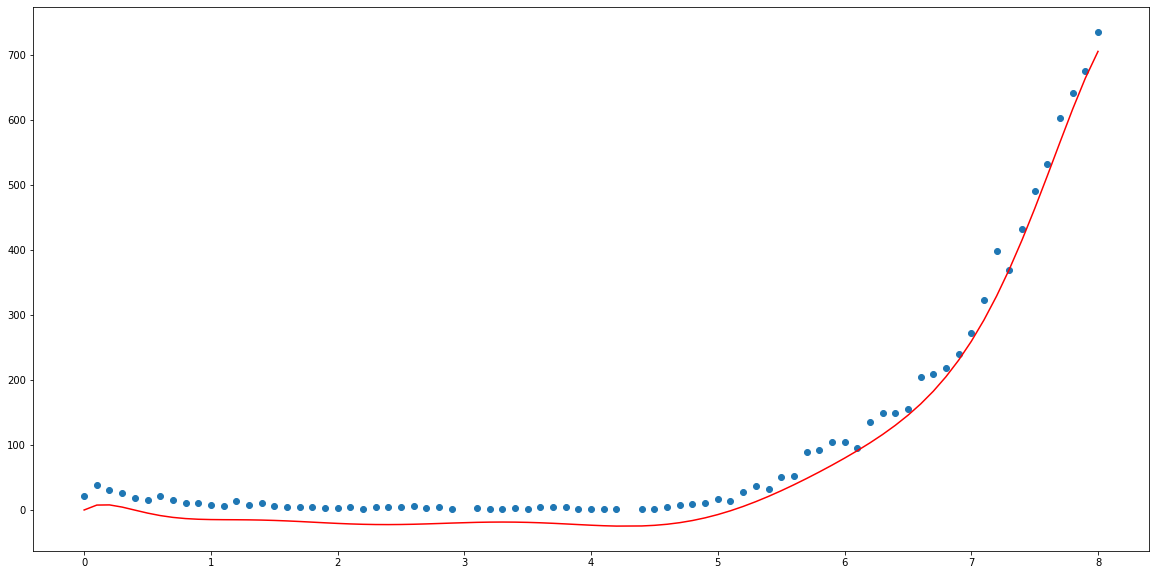

In [185]:
# shape the data for linear regression.
mon_x1 = np.array(mon_group_1.hour).reshape(-1,1)
mon_y1 = np.array(mon_group_1.monday)


# create linear model.
poly1 = PolynomialFeatures(degree=11)
poly_x1 = poly1.fit_transform(mon_x1)
linear_1 = linear_model.LinearRegression()


# fit model to data
model_1 = linear_1.fit(poly_x1, mon_y1)
print(model_1.coef_, model_1.intercept_)

plt.scatter(mon_x1, mon_y1)
plt.plot(mon_x1, np.dot(poly_x1,linear_1.coef_), + linear_1.intercept_, c='r')


[ 0.00000000e+00  3.34621738e+06 -8.31282954e+05  1.13574201e+05
 -9.22525487e+03  4.45882453e+02 -1.18829950e+01  1.34804403e-01] -5708625.824810982


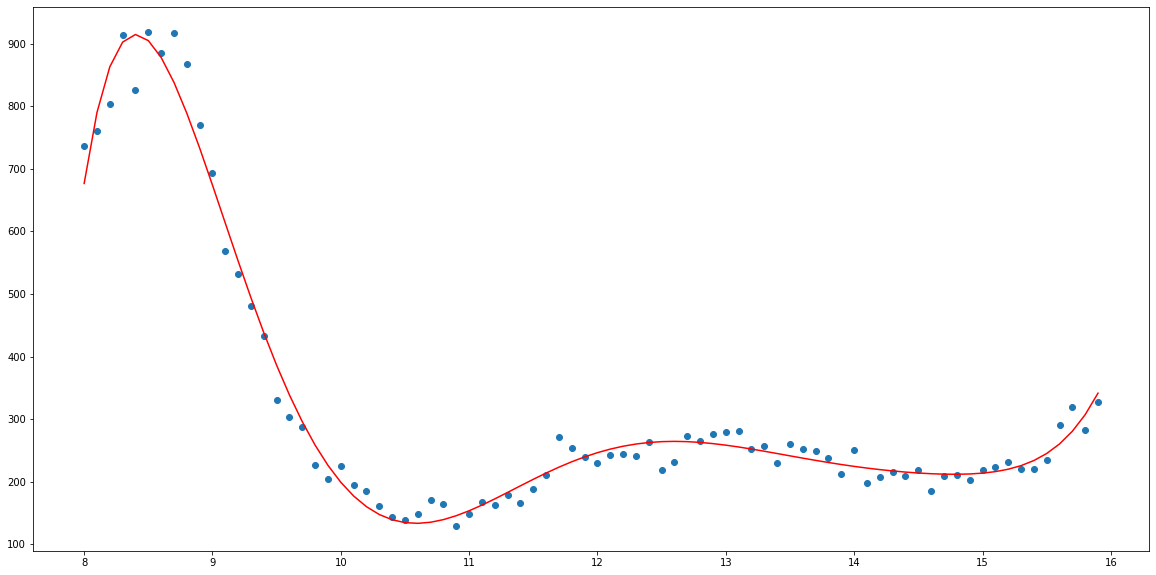

In [202]:
# shape the data for linear regression.
mon_x1 = np.array(mon_group_2.hour).reshape(-1,1)
mon_y1 = np.array(mon_group_2.monday)


# create linear model.
poly1 = PolynomialFeatures(degree=7)
poly_x1 = poly1.fit_transform(mon_x1)
linear_1 = linear_model.LinearRegression()


# fit model to data
model_1 = linear_1.fit(poly_x1, mon_y1)
print(model_1.coef_, model_1.intercept_)

plt.scatter(mon_x1, mon_y1)
plt.plot(mon_x1, np.dot(poly_x1,linear_1.coef_) + linear_1.intercept_, c='r')


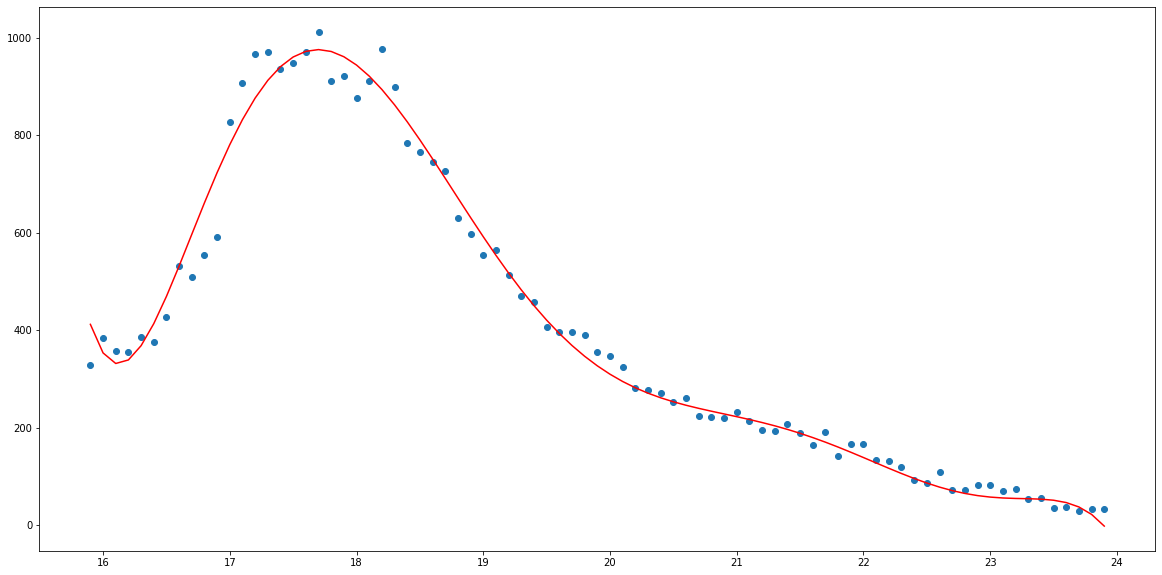

In [216]:
# shape the data for linear regression.
mon_x3 = np.array(mon_group_3.hour).reshape(-1, 1)
mon_y3 = np.array(mon_group_3.monday)

poly = PolynomialFeatures(degree = 7)
poly_x = poly.fit_transform(mon_x3)

linear = linear_model.LinearRegression()
linear.fit(poly_x,mon_y3)
(linear.coef_, linear.intercept_)

plt.scatter(mon_x3, mon_y3)
plt.plot(mon_x3, np.dot(poly_x,linear.coef_) + linear.intercept_, c='r')



## 2b. Repeat `2a` for `saturday`

In [222]:
# organize saturday dataframe into 3 groups.
sat_1 = saturday.iloc[0:80:,]
sat_2 = saturday.iloc[80:160:,]
sat_3 = saturday.iloc[160:240:,]
(sat_1,sat_2,sat_3)

(    hour  saturday
 0    0.0      89.0
 1    0.1      87.0
 2    0.2      98.0
 3    0.3      99.0
 4    0.4      98.0
 ..   ...       ...
 75   7.5      69.0
 76   7.6      82.0
 77   7.7     108.0
 78   7.8     104.0
 79   7.9     104.0
 
 [80 rows x 2 columns],
      hour  saturday
 80    8.0     127.0
 81    8.1     134.0
 82    8.2     127.0
 83    8.3     145.0
 84    8.4     161.0
 ..    ...       ...
 155  15.5     442.0
 156  15.6     433.0
 157  15.7     446.0
 158  15.8     422.0
 159  15.9     425.0
 
 [80 rows x 2 columns],
      hour  saturday
 160  16.0     388.0
 161  16.1     401.0
 162  16.2     418.0
 163  16.3     426.0
 164  16.4     373.0
 ..    ...       ...
 235  23.5      93.0
 236  23.6      95.0
 237  23.7     105.0
 238  23.8      93.0
 239  23.9     111.0
 
 [80 rows x 2 columns])

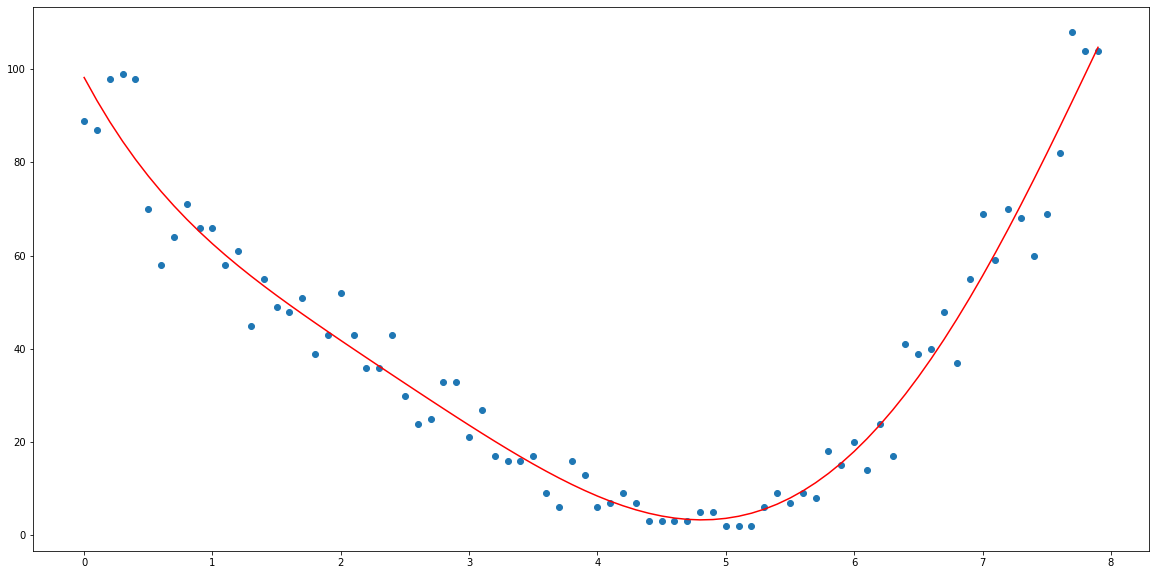

In [229]:
# Saturday group 1 linear regression model
sat_x1 = np.array(sat_1.hour).reshape(-1,1)
sat_y1 = np.array(sat_1.saturday)

# create linear model. 
poly = PolynomialFeatures(degree = 5)
poly_x = poly.fit_transform(sat_x1)
linear = linear_model.LinearRegression()


# fit model to data.
model = linear.fit(poly_x, sat_y1)

# graph the model. 
plt.scatter(sat_x1,sat_y1)
plt.plot(sat_x1, np.dot(poly_x,linear.coef_) + linear.intercept_, c = 'r')

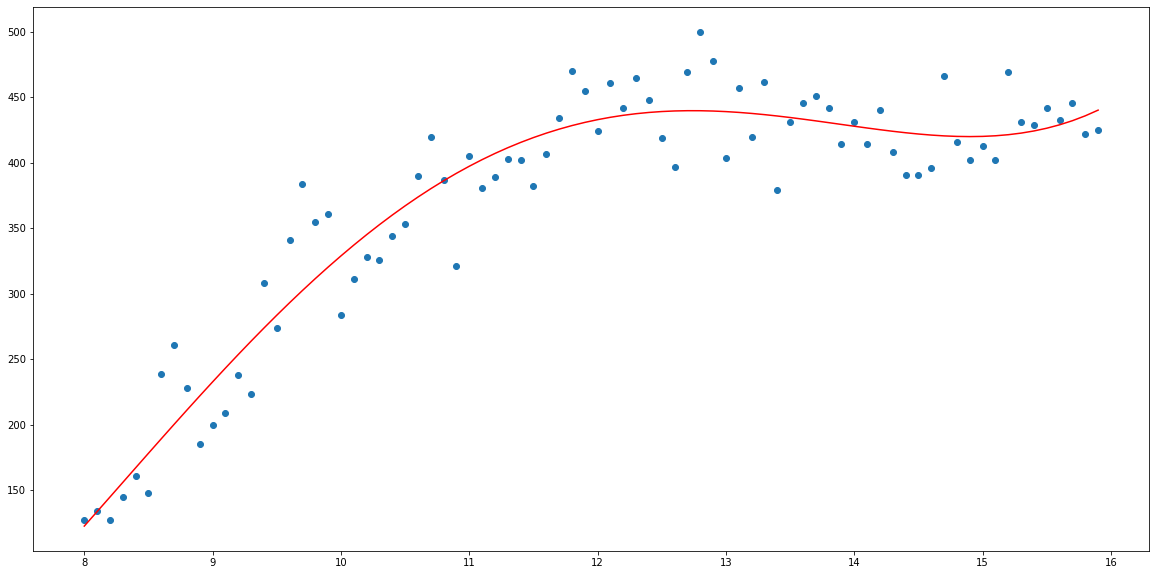

In [238]:
# second group for saturday data.
sat_x2 = np.array(sat_2.hour).reshape(-1,1)
sat_y2 = np.array(sat_2.saturday)

# create linear model. 
poly = PolynomialFeatures(degree = 4)
poly_x2 = poly.fit_transform(sat_x2)
linear = linear_model.LinearRegression()

# fit data to model.
model = linear.fit(poly_x2, sat_y2)

# graph the model. 
plt.scatter(sat_x2, sat_y2)
plt.plot(sat_x2, np.dot(poly_x2, model.coef_) + model.intercept_, c = 'r' )

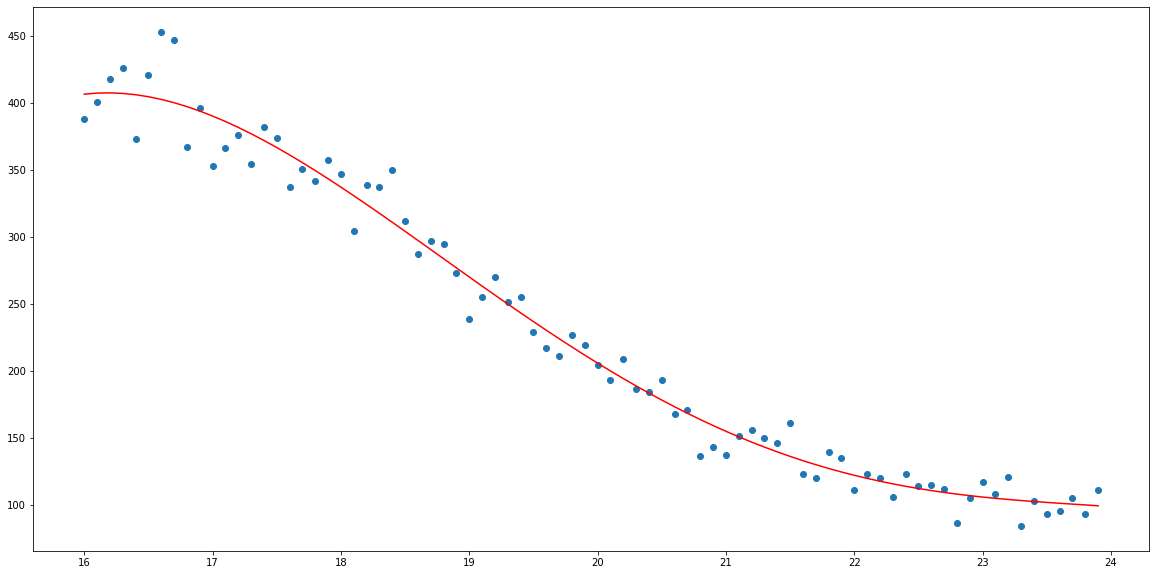

In [244]:
# last saturday group
sat_x3 = np.array(sat_3.hour).reshape(-1,1)
sat_y3 = np.array(sat_3.saturday)

# create models.
poly = PolynomialFeatures(degree = 4)
poly_x3 = poly.fit_transform(sat_x3)
linear = linear_model.LinearRegression()

# fit the data.
model = linear.fit(poly_x3, sat_y3)

# graph the results.
plt.scatter(sat_x3, sat_y3)
plt.plot(sat_x3, np.dot(poly_x3, linear.coef_) + linear.intercept_, c = 'r')

## 3. (for both `monday` and `saturday`) Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


(79, 1) (79,)
[   0.         -123.6555867    22.17307687] 117.19893830138116


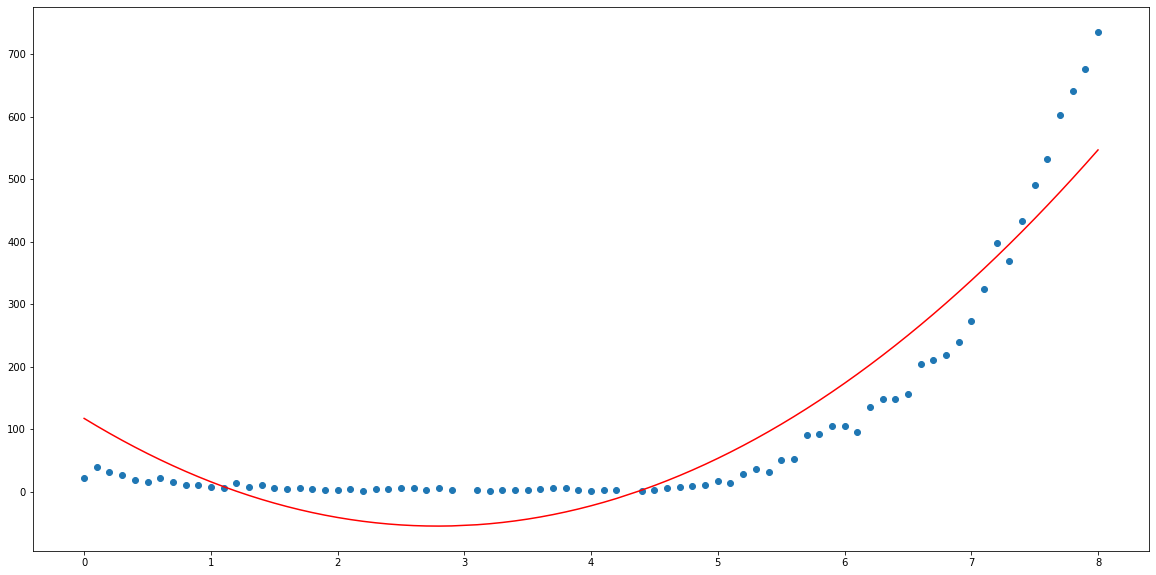

In [280]:
#Monday

# shape the data for ridge regression.
mon_x1 = np.array(mon_group_1.hour).reshape(-1,1)
mon_y1 = np.array(mon_group_1.monday)
print(mon_x1.shape, mon_y1.shape)

# create ridge object.
poly = PolynomialFeatures()
poly_x = poly.fit_transform(mon_x1)

# ridge object
ridge = linear_model.Ridge(alpha = .1)
model = ridge.fit(poly_x, mon_y1)
print(ridge.coef_,ridge.intercept_)

# plot the results.
plt.scatter(mon_x1, mon_y1)
plt.plot(mon_x1, np.dot(poly_x,model.coef_) + model.intercept_, c = 'r')

(79, 1) (79,)
[   0.         -121.86276122   21.96254236] 114.57238123140374


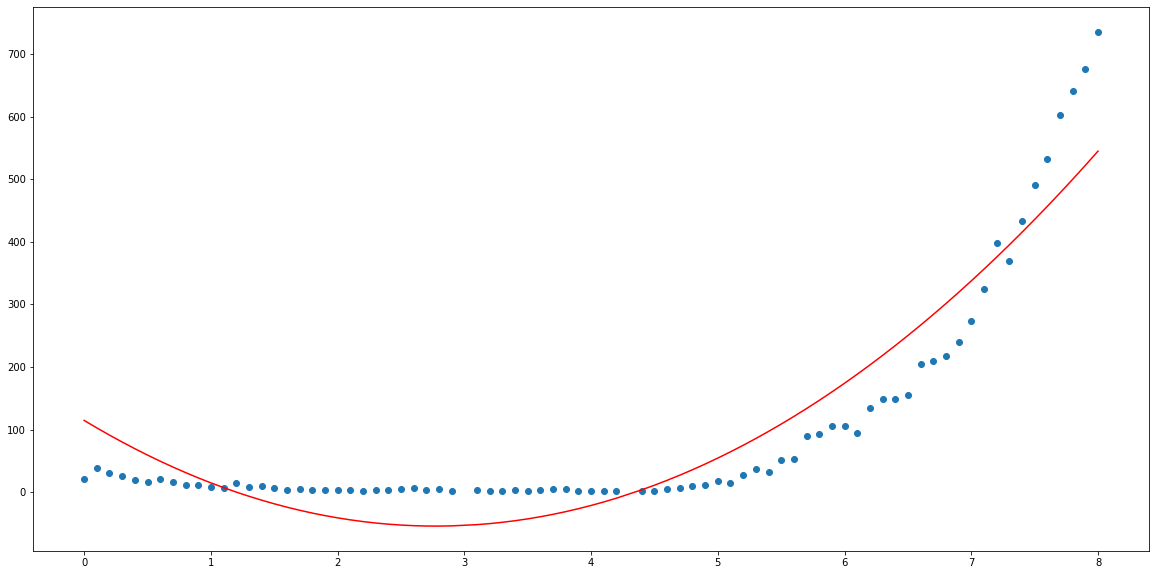

In [281]:
#Monday

# shape the data for ridge regression.
mon_x1 = np.array(mon_group_1.hour).reshape(-1,1)
mon_y1 = np.array(mon_group_1.monday)
print(mon_x1.shape, mon_y1.shape)

# create ridge object.
poly = PolynomialFeatures()
poly_x = poly.fit_transform(mon_x1)

# ridge object
ridge = linear_model.Ridge(alpha = .5)
model = ridge.fit(poly_x, mon_y1)
print(ridge.coef_,ridge.intercept_)

# plot the results.
plt.scatter(mon_x1, mon_y1)
plt.plot(mon_x1, np.dot(poly_x,model.coef_) + model.intercept_, c = 'r')

(79, 1) (79,)
[   0.         -120.55165409   21.80857496] 112.65160036247343


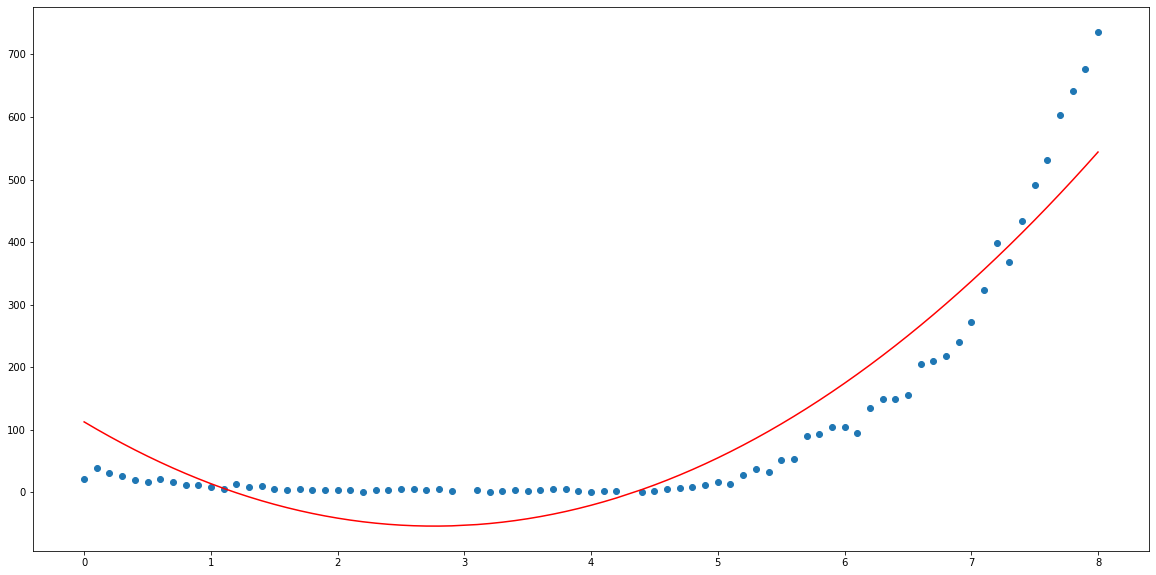

In [282]:
#Monday

# shape the data for ridge regression.
mon_x1 = np.array(mon_group_1.hour).reshape(-1,1)
mon_y1 = np.array(mon_group_1.monday)
print(mon_x1.shape, mon_y1.shape)

# create ridge object.
poly = PolynomialFeatures()
poly_x = poly.fit_transform(mon_x1)

# ridge object
ridge = linear_model.Ridge(alpha = .8)
model = ridge.fit(poly_x, mon_y1)
print(ridge.coef_,ridge.intercept_)

# plot the results.
plt.scatter(mon_x1, mon_y1)
plt.plot(mon_x1, np.dot(poly_x,model.coef_) + model.intercept_, c = 'r')

[  0.         271.29183281  -9.9788956 ] -1394.7637018658684


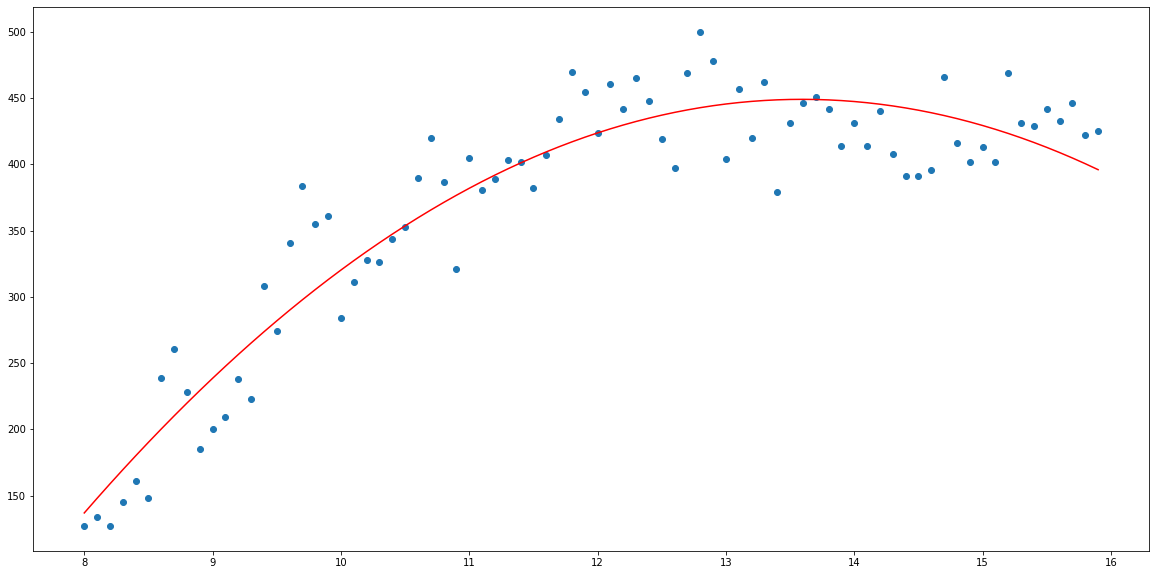

In [283]:
#Saturday attempt 1
# second group for saturday data.
sat_x2 = np.array(sat_2.hour).reshape(-1,1)
sat_y2 = np.array(sat_2.saturday)


# create ridge object.
poly = PolynomialFeatures()
poly_x = poly.fit_transform(sat_x2)

# ridge object
ridge = linear_model.Ridge(alpha = .1)
model = ridge.fit(poly_x, sat_y2)
print(ridge.coef_,ridge.intercept_)

# plot the results.
plt.scatter(sat_x2, sat_y2)
plt.plot(sat_x2, np.dot(poly_x,model.coef_) + model.intercept_, c = 'r')

[  0.         241.61154451  -8.74623035] -1222.6851235457966


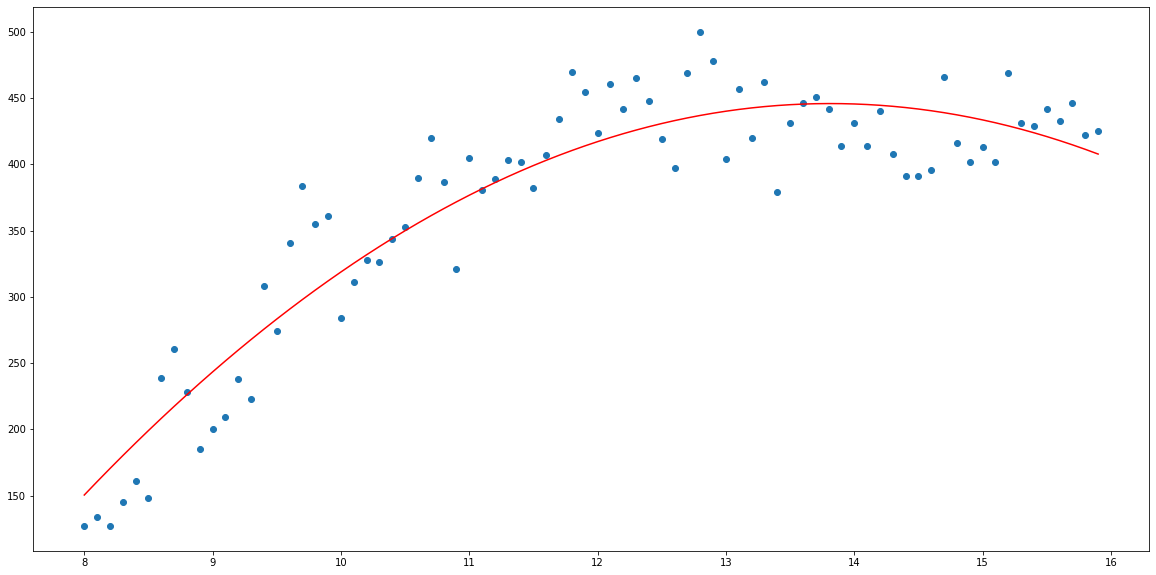

In [284]:
#Saturday attempt 2
# second group for saturday data.
sat_x2 = np.array(sat_2.hour).reshape(-1,1)
sat_y2 = np.array(sat_2.saturday)


# create ridge object.
poly = PolynomialFeatures()
poly_x = poly.fit_transform(sat_x2)

# ridge object
ridge = linear_model.Ridge(alpha = .5)
model = ridge.fit(poly_x, sat_y2)
print(ridge.coef_,ridge.intercept_)

# plot the results.
plt.scatter(sat_x2, sat_y2)
plt.plot(sat_x2, np.dot(poly_x,model.coef_) + model.intercept_, c = 'r')

[  0.         217.78612319  -7.7567266 ] -1084.5514772633398


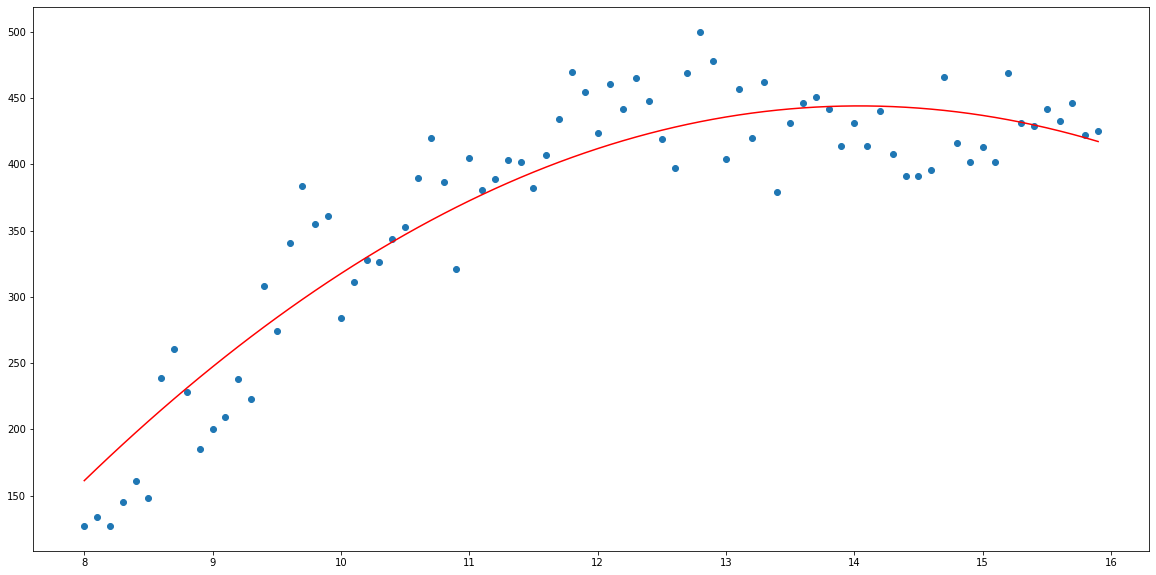

In [285]:
#Saturday attempt 1
# second group for saturday data.
sat_x2 = np.array(sat_2.hour).reshape(-1,1)
sat_y2 = np.array(sat_2.saturday)


# create ridge object.
poly = PolynomialFeatures()
poly_x = poly.fit_transform(sat_x2)

# ridge object
ridge = linear_model.Ridge(alpha = .9)
model = ridge.fit(poly_x, sat_y2)
print(ridge.coef_,ridge.intercept_)

# plot the results.
plt.scatter(sat_x2, sat_y2)
plt.plot(sat_x2, np.dot(poly_x,model.coef_) + model.intercept_, c = 'r')